<a href="https://colab.research.google.com/github/Shreedevi-25/Web-Scraping-on-Flipkart-VerveBridge/blob/main/Predictive_Maintenance_VerveBridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import dash
from dash import dcc, html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output

In [31]:
# Load the dataset
data = pd.read_csv('/content/data.csv')

# Display the first few rows of the dataset
data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [32]:
# Checking for missing values
missing_values = data.isnull().sum()
missing_values

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

In [33]:
# Basic statistics of the dataset
data_description = data.describe()
data_description

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [34]:
# Correlation matrix
correlation_matrix = data.corr()
correlation_matrix

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
footfall,1.000000,0.020457,-0.065816,0.019453,0.025638,-0.089590,-0.043720,-0.003869,-0.018009,-0.073066
tempMode,0.020457,1.000000,-0.010855,0.002142,-0.013956,-0.052369,0.408784,-0.058109,-0.062568,-0.014462
AQ,-0.065816,-0.010855,1.000000,-0.156884,-0.090010,0.618570,0.094656,-0.105868,0.034328,0.583238
USS,0.019453,0.002142,-0.156884,1.000000,-0.352915,-0.399477,-0.032549,-0.206416,-0.225122,-0.466574
CS,0.025638,-0.013956,-0.090010,-0.352915,1.000000,0.048037,-0.026968,0.185739,0.143972,0.018855
VOC,-0.089590,-0.052369,0.618570,-0.399477,0.048037,1.000000,0.008023,0.103628,0.208956,0.797329
RP,-0.043720,0.408784,0.094656,-0.032549,-0.026968,0.008023,1.000000,-0.158841,-0.078499,0.053668
IP,-0.003869,-0.058109,-0.105868,-0.206416,0.185739,0.103628,-0.158841,1.000000,0.372771,0.085624
Temperature,-0.018009,-0.062568,0.034328,-0.225122,0.143972,0.208956,-0.078499,0.372771,1.000000,0.190257
fail,-0.073066,-0.014462,0.583238,-0.466574,0.018855,0.797329,0.053668,0.085624,0.190257,1.000000


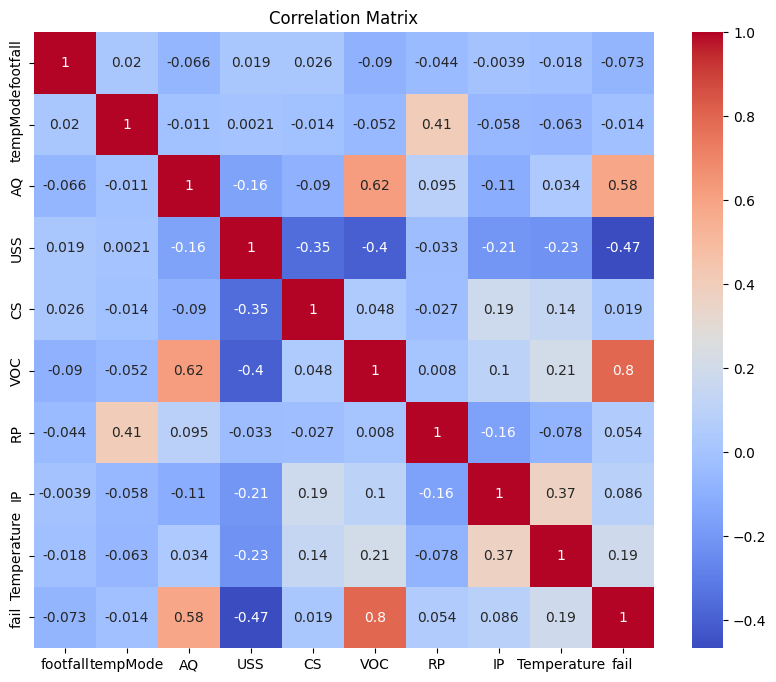

In [35]:
# Plotting correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [36]:
# Splitting the data into training and testing sets
X = data.drop('footfall', axis=1)
y = data['tempMode']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Initializing and training the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Making predictions
y_pred = model.predict(X_test)

In [39]:
# Model evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         9
           4       0.94      1.00      0.97        15
           5       0.86      0.95      0.90        19
           6       1.00      0.40      0.57         5
           7       1.00      1.00      1.00        56

    accuracy                           0.98       189
   macro avg       0.97      0.92      0.93       189
weighted avg       0.98      0.98      0.98       189

[[35  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0]
 [ 0  0  0  0 15  0  0  0]
 [ 0  0  0  0  1 18  0  0]
 [ 0  0  0  0  0  3  2  0]
 [ 0  0  0  0  0  0  0 56]]


In [40]:
# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

In [41]:
# Layout of the app
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("Predictive Maintenance Dashboard"), className="mb-2")
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='prediction-graph'), width=12)
    ]),
    dbc.Row([
        dbc.Col(dcc.Interval(id='interval-component', interval=1*1000, n_intervals=0))
    ])
])

In [43]:
# Callback to update the graph
@app.callback(
    Output('prediction-graph', 'figure'),
    Input('interval-component', 'n_intervals')
)
def update_graph(n):
    fig = {
        'data': [
            {
                'x': data['time'],
                'y': model.predict(data.drop('target', axis=1)),
                'type': 'line',
                'name': 'Predictions'
            },
            {
                'x': data['time'],
                'y': data['target'],
                'type': 'line',
                'name': 'Actual'
            }
        ],
        'layout': {
            'title': 'Real-time Equipment Health Predictions'
        }
    }
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app '__main__'
 * Debug mode: on
